# Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

### Reading Data by using pandas

In [2]:
df=pd.read_csv("/kaggle/input/loan-status-data/loan_data.csv")

# Explore Data

### Reading first 5 rows

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


### Displaying the Dimensions of the DataFrame

In [4]:
df.shape

(381, 13)

### Listing the Column Names of the DataFrame

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Displaying DataFrame Information and Summary

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


### Counting Missing Values in Each Column

In [7]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

### Missing Data Heatmap for Loan Dataset

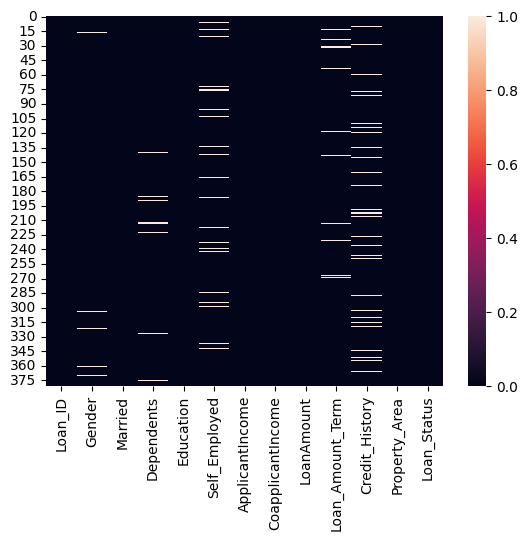

In [8]:
sns.heatmap(df.isnull())
plt.show()

### Cleaned Dataset: Rows with Missing Values Removed

In [9]:
df=df.dropna()

### Heatmap of Missing Values After Data Cleaning

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


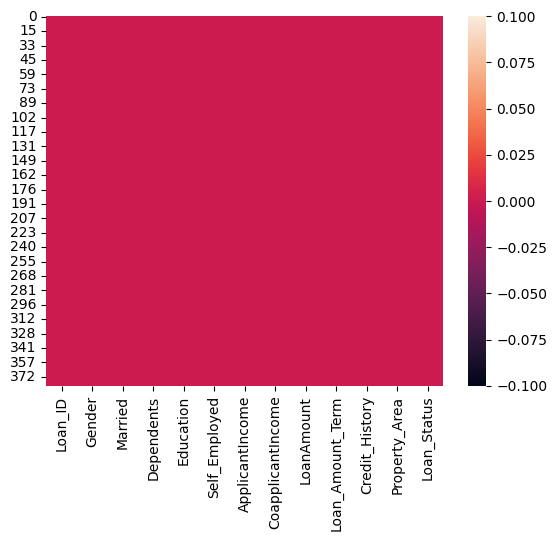

In [10]:
print(df.isnull().sum())
sns.heatmap(df.isnull())
plt.show()

### Count of Duplicate Rows in the Dataset

In [11]:
df.duplicated().sum()

0

### Statistical Summary of the Dataset

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,308.000000,308.000000,308.000000,308.000000,308.000000
mean,3599.126623,1278.434805,104.623377,341.181818,0.853896
std,1462.359612,2520.961308,29.382256,68.246006,0.353785
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2568.750000,0.000000,89.750000,360.000000,1.000000
50%,3329.500000,871.500000,110.000000,360.000000,1.000000
75%,4291.000000,1953.500000,128.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


# Explore Data Using Visualisations

### Pairwise Relationships in the Dataset

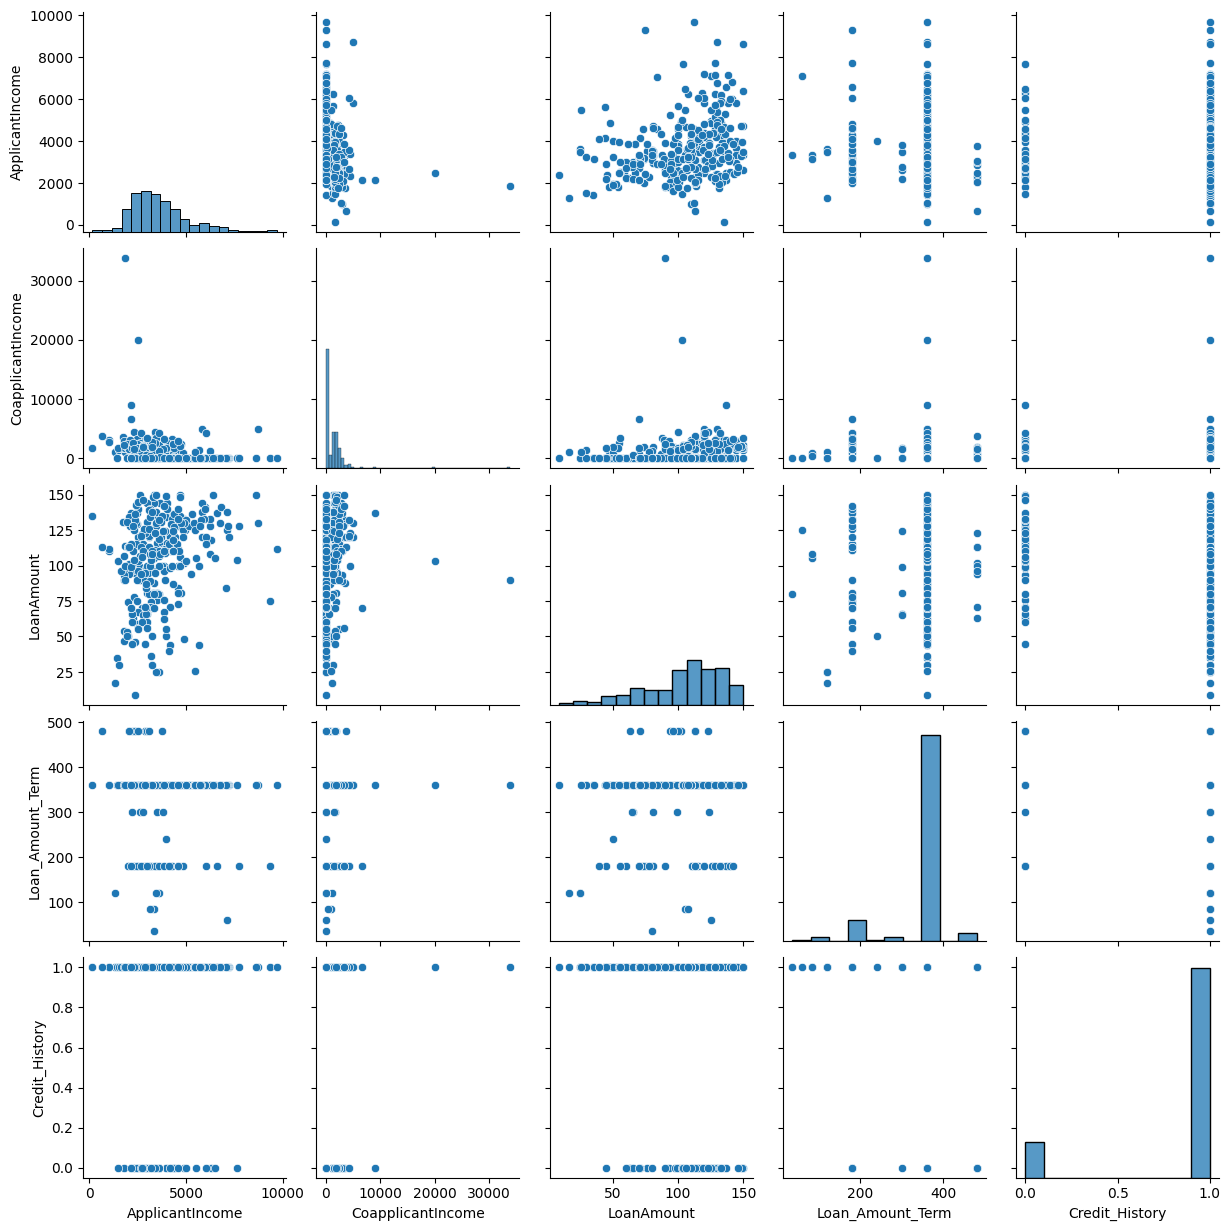

In [13]:
sns.pairplot(df)
plt.show()

### Scatter Plot of Dataset Features

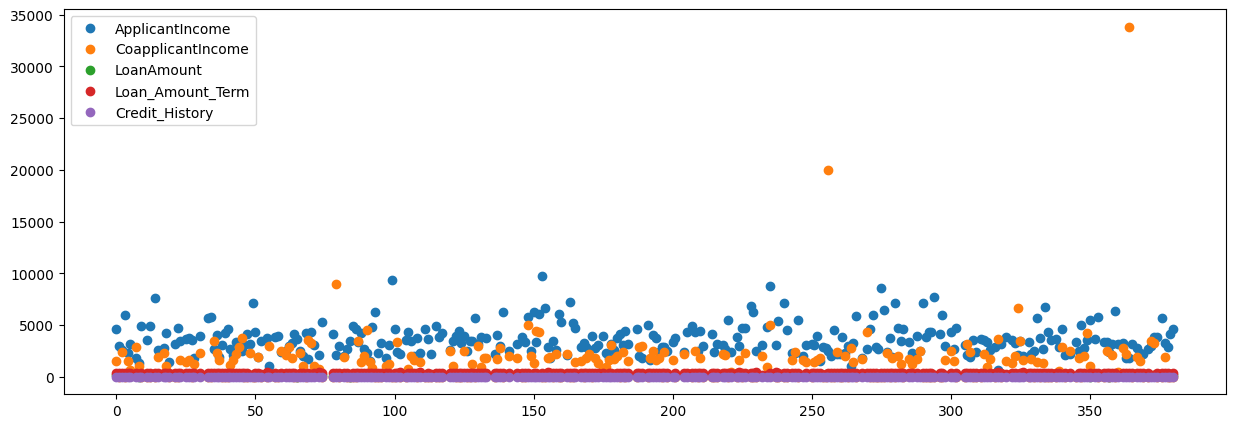

In [14]:
df.plot(figsize=(15,5),style="o")
plt.show()

# Data Analysis

### Unique Values in the 'Dependents' Column

In [16]:
df["Dependents"].unique()

array(['1', '0', '2', '3+'], dtype=object)

### Replaced '3+' with 4 in the 'Dependents' Column

In [17]:
df=df.replace(to_replace="3+",value=4)

### Counts of Each Category in the 'Dependents' Column

In [18]:
df["Dependents"].value_counts()

Dependents
0    194
2     47
1     43
4     24
Name: count, dtype: int64

### Distribution of Categorical Variables in the Dataset

In [19]:
mycolumn=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area', 'Loan_Status']
for i in mycolumn:
    types=df[i].value_counts().reset_index()
    print(types)
    types.columns = [i, 'count']
    fig = px.pie(types, values='count', names=i, title=f'Distribution of {i}')
    fig.show()
    print("***********************************************************************")

   Gender  count
0    Male    245
1  Female     63


***********************************************************************
  Married  count
0     Yes    185
1      No    123


***********************************************************************
  Dependents  count
0          0    194
1          2     47
2          1     43
3          4     24


***********************************************************************
      Education  count
0      Graduate    229
1  Not Graduate     79


***********************************************************************
  Self_Employed  count
0            No    280
1           Yes     28


***********************************************************************
  Property_Area  count
0     Semiurban    123
1         Urban     99
2         Rural     86


***********************************************************************
  Loan_Status  count
0           Y    219
1           N     89


***********************************************************************


### Count of Loan Status by Education Level

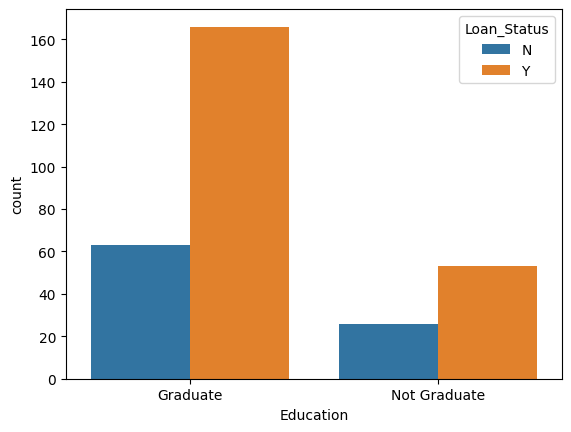

In [20]:
sns.countplot(data=df,x="Education",hue="Loan_Status")
plt.show()

### Loan Status Distribution by Gender

Loan_Status   N    Y
Gender              
Female       23   40
Male         66  179
#####################


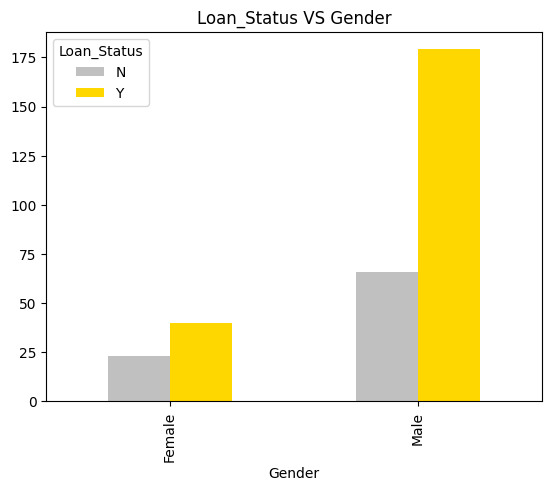

In [21]:
print(pd.crosstab(df["Gender"],df["Loan_Status"]))
print("#####################")
pd.crosstab(df["Gender"],df["Loan_Status"]).plot(kind="bar",color=({"gold","silver"}))
plt.title(f"Loan_Status VS Gender")
plt.show()

### Loan Status Distribution by Property Area

Loan_Status     N    Y
Property_Area         
Rural          33   53
Semiurban      23  100
Urban          33   66
*****************************************


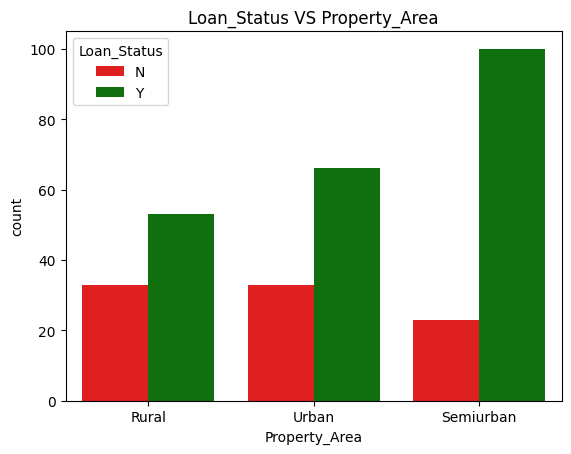

In [22]:
print(pd.crosstab(df["Property_Area"],df["Loan_Status"]))
print("*****************************************")
sns.countplot(data=df,x="Property_Area",hue="Loan_Status", palette=['r', 'g'])
plt.title(f"Loan_Status VS Property_Area")
plt.show()

### Loan Status Distribution by Married Status

Loan_Status   N    Y
Married             
No           44   79
Yes          45  140
*****************************************


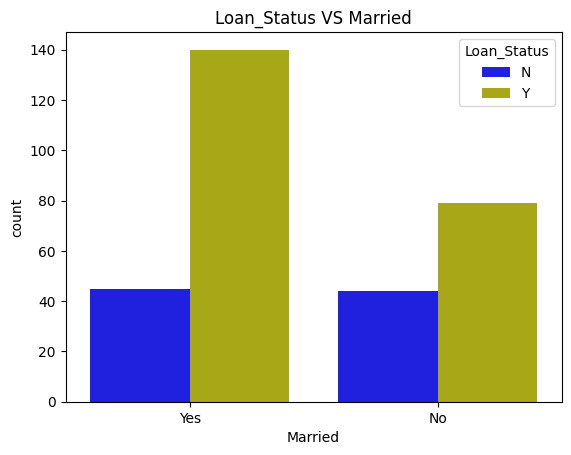

In [23]:
print(pd.crosstab(df["Married"],df["Loan_Status"]))
print("*****************************************")
sns.countplot(data=df,x="Married",hue="Loan_Status", palette=['b', 'y'])
plt.title(f"Loan_Status VS Married")
plt.show()

### Removed 'Loan_ID' Column from the Dataset

In [24]:
df=df.drop("Loan_ID",axis=1)

### Data Types of Each Column in the Dataset

In [25]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Initialized Label Encoder for Categorical Variable Transformation

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

### Label Encoding of Categorical Columns in the Dataset

In [27]:
obj_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for k in obj_columns:
    # Convert all entries in the column to strings
    df[k] = df[k].astype(str)

    # Now apply label encoding
    df[k] = label_encoder.fit_transform(df[k])


### Encoded 'Loan_Status' Column: 'Y' as 1 and 'N' as 2

In [28]:
df.replace({"Loan_Status":{"Y":1,"N":2}},inplace=True)

### Data Types of Each Column After Encoding

In [29]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

### Correlation Matrix of the Dataset

In [30]:
cor=df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.342512,0.240565,0.131954,-0.007636,0.018276,0.107629,0.107087,-0.107448,0.063704,0.038059,-0.085155
Married,0.342512,1.000000,0.402679,0.023510,-0.018867,-0.042202,0.059177,0.177552,-0.152815,0.056854,0.053039,-0.123695
Dependents,0.240565,0.402679,1.000000,0.107501,0.056730,0.152565,-0.076818,0.080693,-0.115610,0.023416,0.034471,-0.031610
Education,0.131954,0.023510,0.107501,1.000000,0.021160,-0.040449,-0.052910,-0.041882,-0.141566,0.011413,-0.070464,0.052029
Self_Employed,-0.007636,-0.018867,0.056730,0.021160,1.000000,0.231252,-0.065120,0.012915,-0.051897,0.002907,-0.075624,0.047567
ApplicantIncome,0.018276,-0.042202,0.152565,-0.040449,0.231252,1.000000,-0.243677,0.267628,-0.099571,0.030307,-0.059283,-0.033927
CoapplicantIncome,0.107629,0.059177,-0.076818,-0.052910,-0.065120,-0.243677,1.000000,0.123028,-0.004158,0.012715,0.030139,0.001546
LoanAmount,0.107087,0.177552,0.080693,-0.041882,0.012915,0.267628,0.123028,1.000000,0.135069,-0.043853,-0.184085,-0.053104
Loan_Amount_Term,-0.107448,-0.152815,-0.115610,-0.141566,-0.051897,-0.099571,-0.004158,0.135069,1.000000,0.015269,-0.101685,0.009547
Credit_History,0.063704,0.056854,0.023416,0.011413,0.002907,0.030307,0.012715,-0.043853,0.015269,1.000000,0.058195,-0.588029


### Heatmap of Feature Correlations

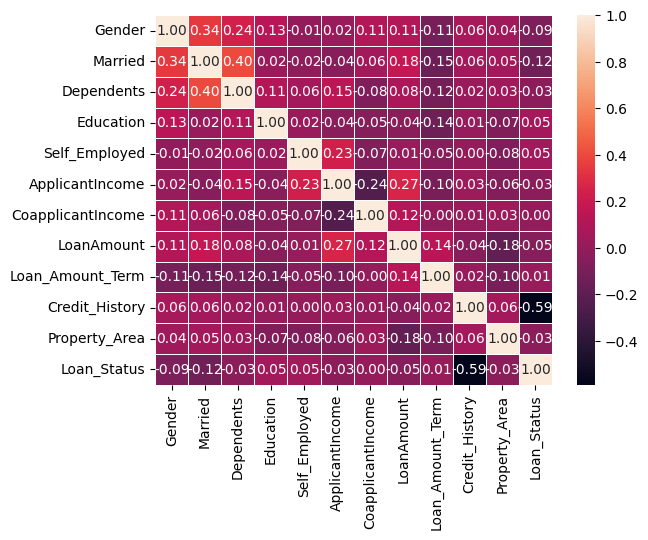

In [31]:
sns.heatmap(cor,annot=True,lw='0.5',fmt="0.2f")
plt.show()

# Building Model

### Separated Features and Target Variable from the Dataset

In [32]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

### Split Dataset into Training and Testing Sets

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Initialized Machine Learning Models for Classification

In [34]:
model1=LogisticRegression()
model2= KNeighborsClassifier()
model3=GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=300)

### Model Training and Evaluation Function

In [35]:
def pred(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    print(classification_report(pre,y_test))
    con=confusion_matrix(y_test,pre)
    sns.heatmap(con, annot=True, cmap='viridis', cbar=True) 

### Evaluating Logistic Regression Model Performance

              precision    recall  f1-score   support

           1       0.95      0.80      0.87        50
           2       0.50      0.83      0.62        12

    accuracy                           0.81        62
   macro avg       0.73      0.82      0.75        62
weighted avg       0.86      0.81      0.82        62



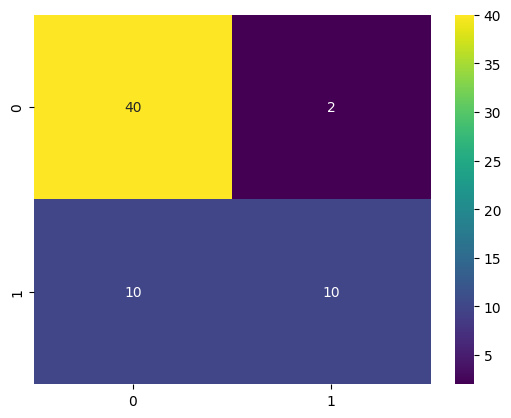

In [36]:
pred(model1)

### Evaluating K-Neighbors Classifier Model Performance

              precision    recall  f1-score   support

           1       0.88      0.76      0.81        49
           2       0.40      0.62      0.48        13

    accuracy                           0.73        62
   macro avg       0.64      0.69      0.65        62
weighted avg       0.78      0.73      0.74        62



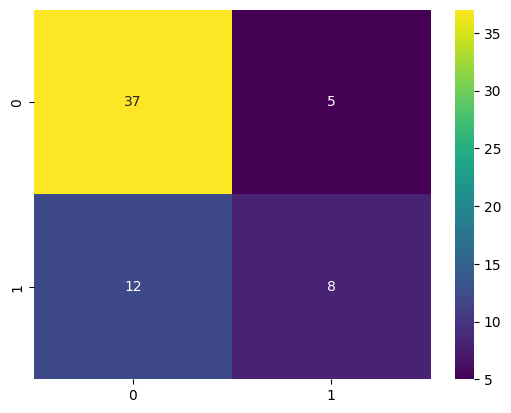

In [37]:
pred(model2)

### Evaluating Gradient Boosting Classifier Model Performance

              precision    recall  f1-score   support

           1       0.95      0.85      0.90        47
           2       0.65      0.87      0.74        15

    accuracy                           0.85        62
   macro avg       0.80      0.86      0.82        62
weighted avg       0.88      0.85      0.86        62



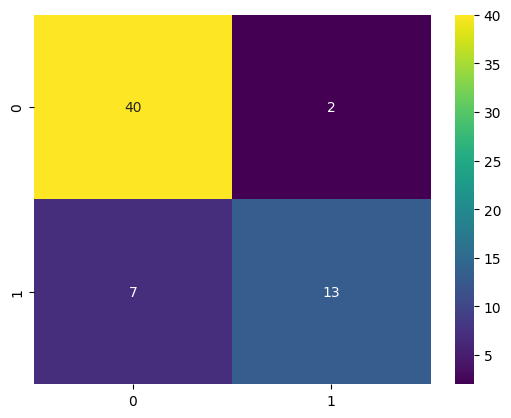

In [41]:
pred(model3)